# Original Datasets 
## Consist of :
https://data.mendeley.com/datasets/8h65ywd2jr/1?fbclid=IwAR1726GnO89IIABFXwNWdileS3X7U4H8ZPcyZLb04fZMx4CX7fU1B6Ln1Do
This COVID-19 dataset consists of Non-COVID and COVID cases of both X-ray and CT images. The associated dataset is augmented with different augmentation techniques to generate about 17100 X-ray and CT images. The dataset contains two main folders, one for the X-ray images, which includes two separate sub-folders of 5500 Non-COVID images and 4045 COVID images. The other folder contains the CT images. It includes two separate sub-folders of 2628 Non-COVID images and 5427 COVID images
### Contributor(s): Walid El-Shafai, Fathi E. Abd El-Samie

### And Datasets of PNEUMONIA from :
https://www.kaggle.com/masumrefat/chest-xray-images-pneumonia-and-covid19
Note: please do not claim diagnostic performance of a model without a clinical study! This is not a kaggle competition dataset.
### ==========================================================================================
### I collects Data from to link and sperated it to 3 main folder :
### First one for COVID
### Second one for NORMAL
### Third one for PNEUMONIA
#### my Data in this Direct Link :
https://drive.google.com/file/d/1XInAZyBbLkHcufl9fe8a4NZ08mCBvMt2/view?usp=sharing

### Note:
### To use this Data you must put Data of X-ray in above link in same folder of Code jupyter

### I used GPU Engine to implement this code 

In [150]:
#for check your Engine
!nvidia-smi -L
!nvidia-smi

GPU 0: GeForce GT 1030 (UUID: GPU-474456ba-b8d8-b01b-ac33-2e102f55eb19)
Sun Jun 14 06:50:10 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 446.14       Driver Version: 446.14       CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GT 1030    WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   45C    P8    N/A /  30W |   1903MiB /  2048MiB |      4%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
from tqdm import tqdm
import keras
from PIL import Image
import math

Using TensorFlow backend.


# Separate Datasets of Covid-19 to train and test and predict
#### In this section we 'll Preparation Datasets to image processing which converts Extention to.PNG because datasets have many image file formats and save it in 3 folders (train, test, predict )

### Folder Covid-19 
#### train -->60%
#### test -->25%
#### predict -->10%

In [2]:
#Creat folder to save a new data
os.mkdir('train')
os.mkdir('test')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'train'

In [3]:
#convert images to certen Extention
Extention='png'

In [3]:
path='X-ray/COVID/*.*'
 
os.mkdir('train/COVID-19')
os.mkdir('test/COVID-19')
os.mkdir('Predict')
files = gb.glob(pathname= str(path))
l=len(files)
i=1
################################################
for file in files:  
    image = cv2.imread(file)
    conimg=cv2.imwrite( f'train/COVID-19//{i}.'+Extention, image)
    precentage=math.floor((60/100) * l)
    if i == precentage:
        break
    else:
        i+=1
###################################
i+=1
for file in files:  
    image = cv2.imread(file)
    conimg=cv2.imwrite( f'test/COVID-19//{i}.'+Extention, image)
    precentage=math.floor((85/100) * l)
    if i == precentage:
        break
    else:
        i+=1
#####################################
i+=1
for file in files:  
    image = cv2.imread(file)
    conimg=cv2.imwrite( f'Predict//cov1{i}.'+Extention, image)
    precentage=math.floor((10/10) * l)
    if i == precentage:
        break
    else:
        i+=1
#Add more data from another folder((Optionals))
i+=1
files2 = gb.glob(pathname= str('Covid_19/*.*'))
for file in files2: 
    image = cv2.imread(file)
    conimg=cv2.imwrite( f'Predict//cov2{i}.'+Extention, image)
    precentage=math.floor((10/10) * l)
    if i == precentage:
        break
    else:
        i+=1

### Folder Normal
#### train -->60%
#### test -->30%
#### predict -->10%

In [4]:
path='X-ray/NORMAL/*.*'
#to creat folder to save a new data 
os.mkdir('train/NORMAL')
os.mkdir('test/NORMAL')

files = gb.glob(pathname= str(path))
l=len(files)
i=1
################################################
for file in files:  
    image = cv2.imread(file)
    conimg=cv2.imwrite( f'train/NORMAL//{i}.'+Extention, image)
    precentage=math.floor((6/10) * l)
    if i == precentage:
        break
    else:
        i+=1
###################################
i+=1
for file in files:  
    image = cv2.imread(file)
    conimg=cv2.imwrite( f'test/NORMAL//{i}.'+Extention, image)
    precentage=math.floor((9/10) * l)
    if i == precentage:
        break
    else:
        i+=1
#####################################
i+=1
for file in files:  
    image = cv2.imread(file)
    conimg=cv2.imwrite( f'Predict//nor{i}.'+Extention, image)
    precentage=math.floor((10/10) * l)
    if i == precentage:
        break
    else:
        i+=1

### Folder PNEUMONIA
#### train -->60%
#### test -->30%
#### predict -->10%

In [5]:
path='X-ray/PNEUMONIA/*.*'
#to creat folder to save a new data 
os.mkdir('train/PNEUMONIA')
os.mkdir('test/PNEUMONIA')

files = gb.glob(pathname= str(path))
l=len(files)
i=1
################################################
for file in files:  
    image = cv2.imread(file)
    conimg=cv2.imwrite( f'train/PNEUMONIA//{i}.'+Extention, image)
    precentage=math.floor((6/10) * l)
    if i == precentage:
        break
    else:
        i+=1
###################################
i+=1
for file in files:  
    image = cv2.imread(file)
    conimg=cv2.imwrite( f'test/PNEUMONIA//{i}.'+Extention, image)
    precentage=math.floor((9/10) * l)
    if i == precentage:
        break
    else:
        i+=1
#####################################
i+=1
for file in files:  
    image = cv2.imread(file)
    conimg=cv2.imwrite( f'Predict//pne{i}.'+Extention, image)
    precentage=math.floor((10/10) * l)
    if i == precentage:
        break
    else:
        i+=1

### ====================================================================================

# Open Folders((Optional))

### now let's first check the train folder to have a look to its content

In [4]:
for folder in  os.listdir('train//') : 
    files = gb.glob(pathname= str( 'train//' + folder + '/*.*'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 2426 in folder COVID-19
For training data , found 2364 in folder NORMAL
For training data , found 2563 in folder PNEUMONIA


### now let's first check the test folder to have a look to its content

In [5]:
for folder in  os.listdir('test//') : 
    files = gb.glob(pathname= str( 'test//' + folder + '/*.*'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 1011 in folder COVID-19
For training data , found 1182 in folder NORMAL
For training data , found 1282 in folder PNEUMONIA


### now let's first check the train folder to have a look to its content

In [6]:
files = gb.glob(pathname= str('Predict/*.*'))
print(f'For Prediction data , found {len(files)}')

For Prediction data , found 1669


### ====================================================================================


# Checking Images

now we need to check the images sizes , to know ow they looks like

since we have 3 categories , we first need to create a dictionary with their names & indices , also create a function to get the code back

### There are two encoder for label :
#### 1-label encoder which means every label has desimal number 
#### 2-one hot encoder which means every label has code like (COVID-19:100,NORMAL:010,PNEUMONIA:001)

In [7]:
#used label encoder
code = {'COVID-19':0 ,'NORMAL':1,'PNEUMONIA':2}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x 

### now how about the images sizes in train folder

In [9]:
size = []
for folder in  tqdm(os.listdir('train')) : 
    files = gb.glob(pathname= str('train//' + folder + '/*.'+Extention))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

100%|██████████| 3/3 [05:53<00:00, 117.83s/it]


(1024, 1024, 3)    2661
(524, 640, 3)       134
(2000, 2000, 3)      88
(842, 1024, 3)       17
(1550, 1598, 3)      13
                   ... 
(1128, 1600, 3)       1
(736, 1168, 3)        1
(1256, 1624, 3)       1
(1913, 2252, 3)       1
(211, 239, 3)         1
Length: 3275, dtype: int64

### now how about the images sizes in test folder

In [10]:
size = []
for folder in  tqdm(os.listdir('test')) : 
    files = gb.glob(pathname= str('test//' + folder + '/*.'+Extention))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

100%|██████████| 3/3 [03:12<00:00, 64.14s/it]


(1024, 1024, 3)    532
(524, 640, 3)      121
(2000, 2000, 3)     75
(842, 1024, 3)      14
(399, 466, 3)       12
                  ... 
(1764, 2093, 3)      1
(984, 1208, 3)       1
(1109, 1616, 3)      1
(440, 750, 3)        1
(519, 790, 3)        1
Length: 2082, dtype: int64

### now how about the images sizes in Predict folder

In [11]:
size = []
files = gb.glob(pathname= str('Predict/*.'+Extention))
for file in files: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

(1024, 1024, 3)    411
(524, 640, 3)       98
(2000, 2000, 3)     62
(842, 1024, 3)      16
(659, 651, 3)       12
                  ... 
(1408, 1752, 3)      1
(696, 1152, 3)       1
(1024, 1223, 3)      1
(863, 1244, 3)       1
(519, 790, 3)        1
Length: 804, dtype: int64

### ====================================================================================

# Reading Images

now it's time to read all images & convert it into arrays

first we'll create a variable s , which refer to size , so we can change it easily 

let's use now size = 150 , so it will be suitable amount to contain accuracy without losing so much time in training

In [8]:
s=128

In [160]:
X_train = []
y_train = []
training_data = []
for folder in  tqdm(os.listdir('train')) : 
    files = gb.glob(pathname= str( 'train//' + folder + '/*.'+Extention))
    for file in files: 
        image = cv2.imread(file)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image_array = cv2.resize(gray_image , (s,s), interpolation = cv2.INTER_AREA)
        X_train.append(list(image_array))
        y_train.append(code[folder])
        training_data.append([image_array, code[folder]])

100%|██████████| 3/3 [04:00<00:00, 80.31s/it]


In [161]:
print(f'we have {len(X_train)} items in X_train')

we have 7353 items in X_train


###  I used Scratch code to make a Shuffle for X_train and y_train To combat Over Fitting

In [162]:
# test for randomness
print(len(training_data))
print('y_train',y_train[7000:7025])

#using Random library
import random
random.shuffle(training_data)
for sample in training_data[:10]:# just test for Shuffle
    print(sample[1])
    
#then return data to X_train and y_train
X_train = []
y_train = []

for features,label in training_data:
    X_train.append(features)
    y_train.append(label)

print('y_train after shuffle',y_train[7000:7025]) # so data it's random

7353
y_train [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
0
0
0
1
1
2
2
1
0
0
y_train after shuffle [0, 0, 0, 0, 2, 0, 1, 1, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 1, 1, 1]


In [163]:
# free some space in Ram
del training_data # means var train ,we did not needed any more so deleted for free space from ram 

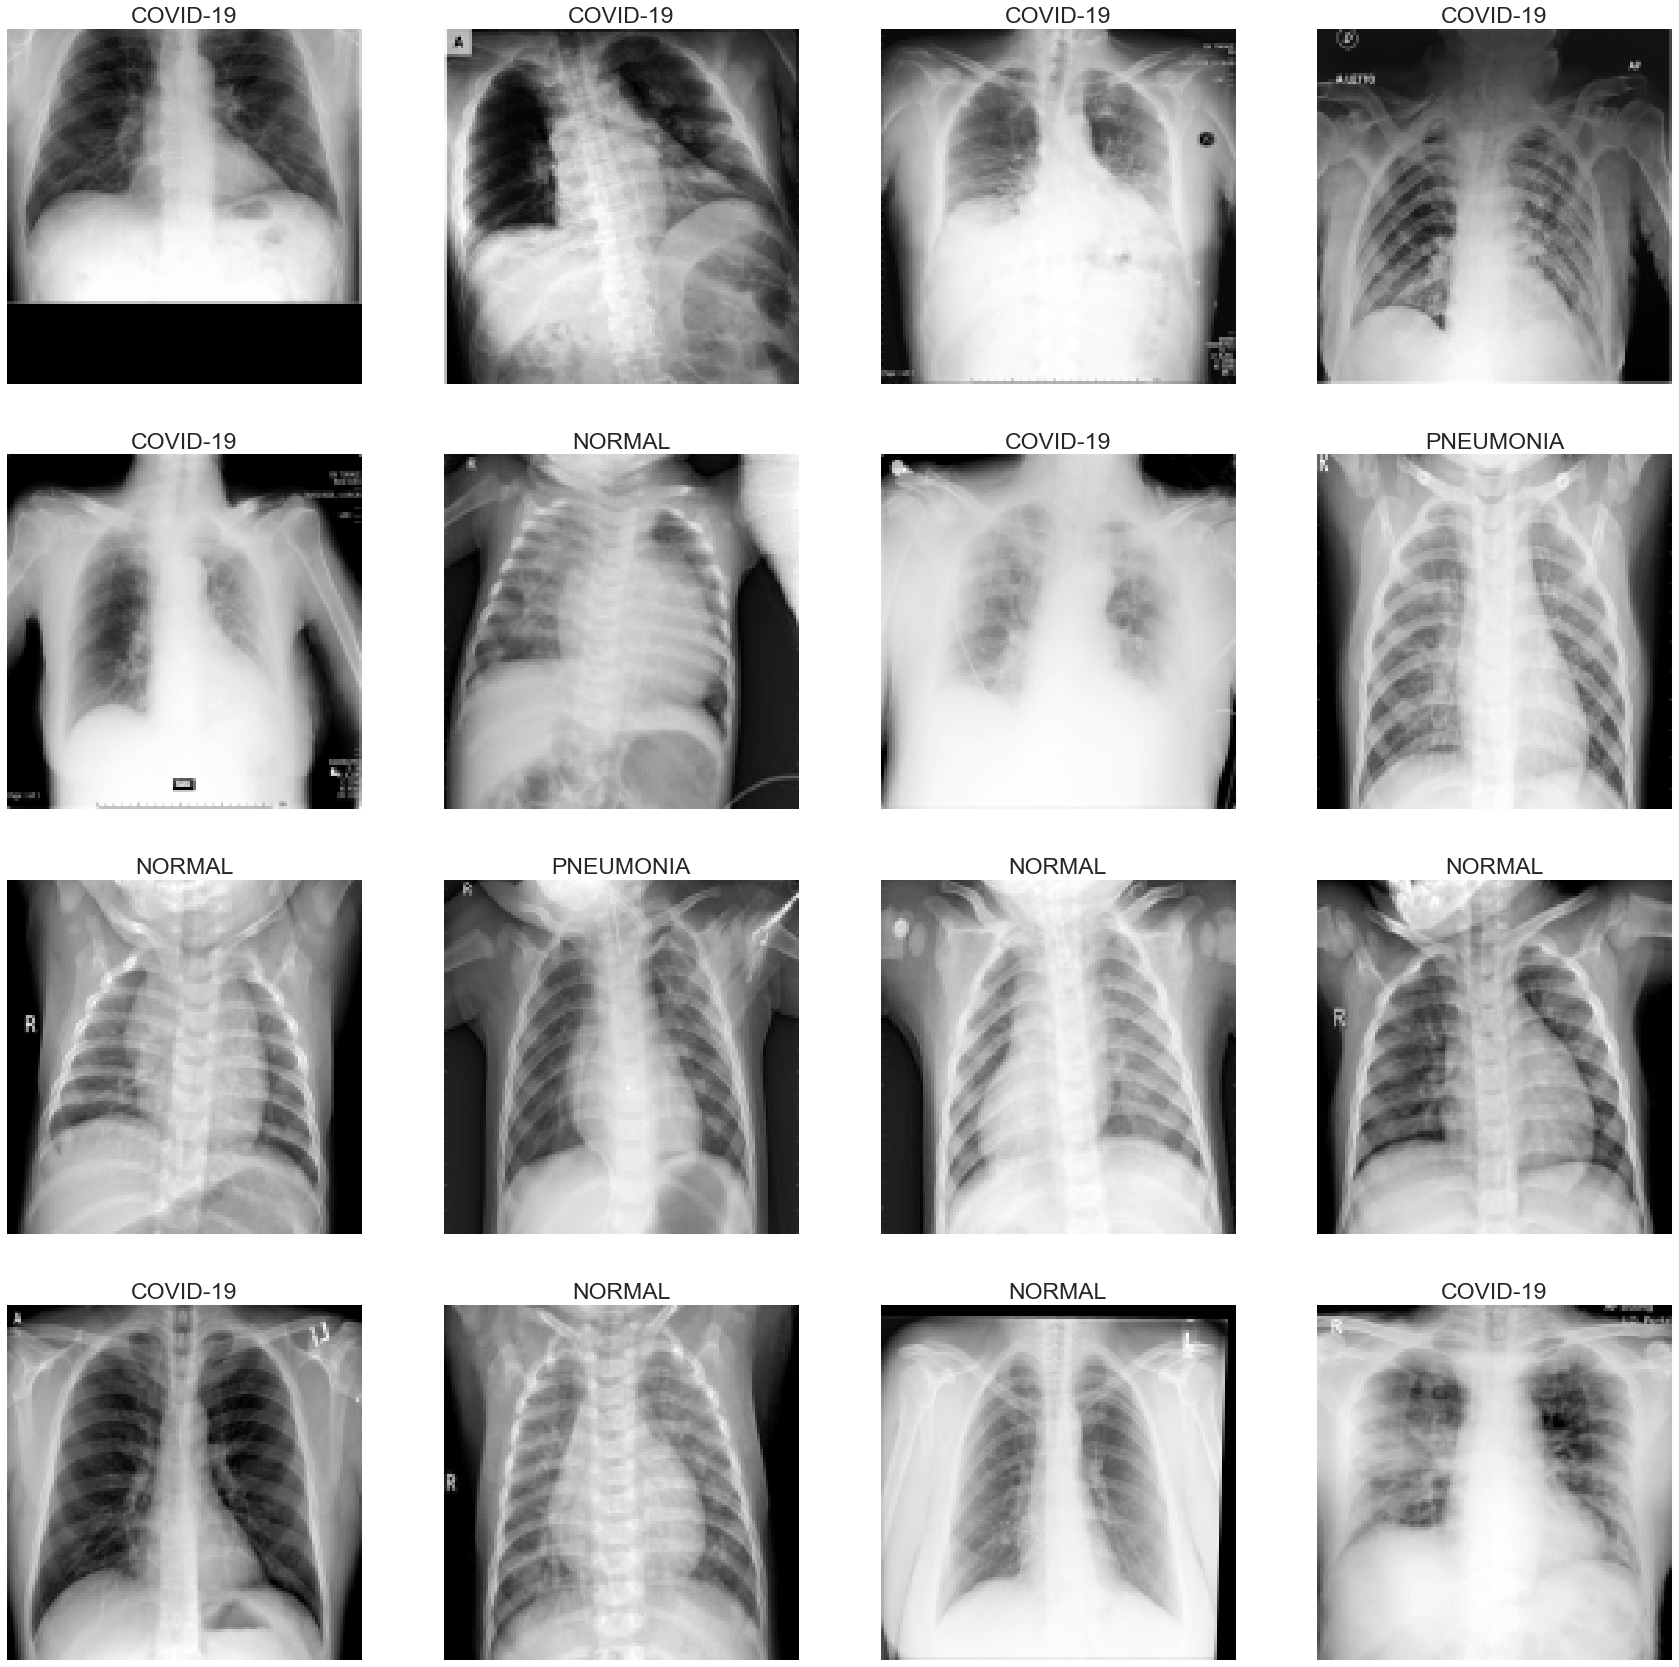

In [174]:
plt.figure(figsize=(30,30))
for n , i in enumerate(list(np.random.randint(0,len(X_train),16))) : 
    plt.subplot(4,4,n+1)
    plt.imshow(X_train[i]) 
    plt.gray()
    plt.axis('off')
    plt.title(getcode(y_train[i]), fontsize=23)

In [165]:
X_test = []
y_test = []
training_data = []
for folder in  tqdm(os.listdir('test')) : 
    files = gb.glob(pathname= str('test//' + folder + '/*.'+Extention))
    for file in files: 
        image = cv2.imread(file)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image_array = cv2.resize(gray_image , (s,s), interpolation = cv2.INTER_AREA)
        X_test.append(list(image_array))
        y_test.append(code[folder])
        training_data.append([image_array, code[folder]])

100%|██████████| 3/3 [02:10<00:00, 43.63s/it]


In [166]:
print(f'we have {len(X_test)} items in X_test')

we have 3475 items in X_test


###  I used Scratch code to make a Shuffle for X_train and y_train To combat Over Fitting

In [167]:
# test for randomness
print(len(training_data))
print('y_test',y_test[2000:2025])


import random
random.shuffle(training_data)
for sample in training_data[:10]:# just test for Shuffle
    print(sample[1])
    
#then return data to X_train and y_train
X_test = []
y_test = []

for features,label in training_data:
    X_test.append(features)
    y_test.append(label)

print('y_test after shuffle',y_test[2000:2025]) # so data it's random

3475
y_test [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
2
2
1
0
0
1
1
2
2
1
y_test after shuffle [1, 0, 0, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 0, 2, 2, 0, 1, 1, 1, 1, 0, 2, 0, 0]


In [168]:
# free some space in ram
del training_data # means var train ,we did not needed any more so deleted for free space from ram 

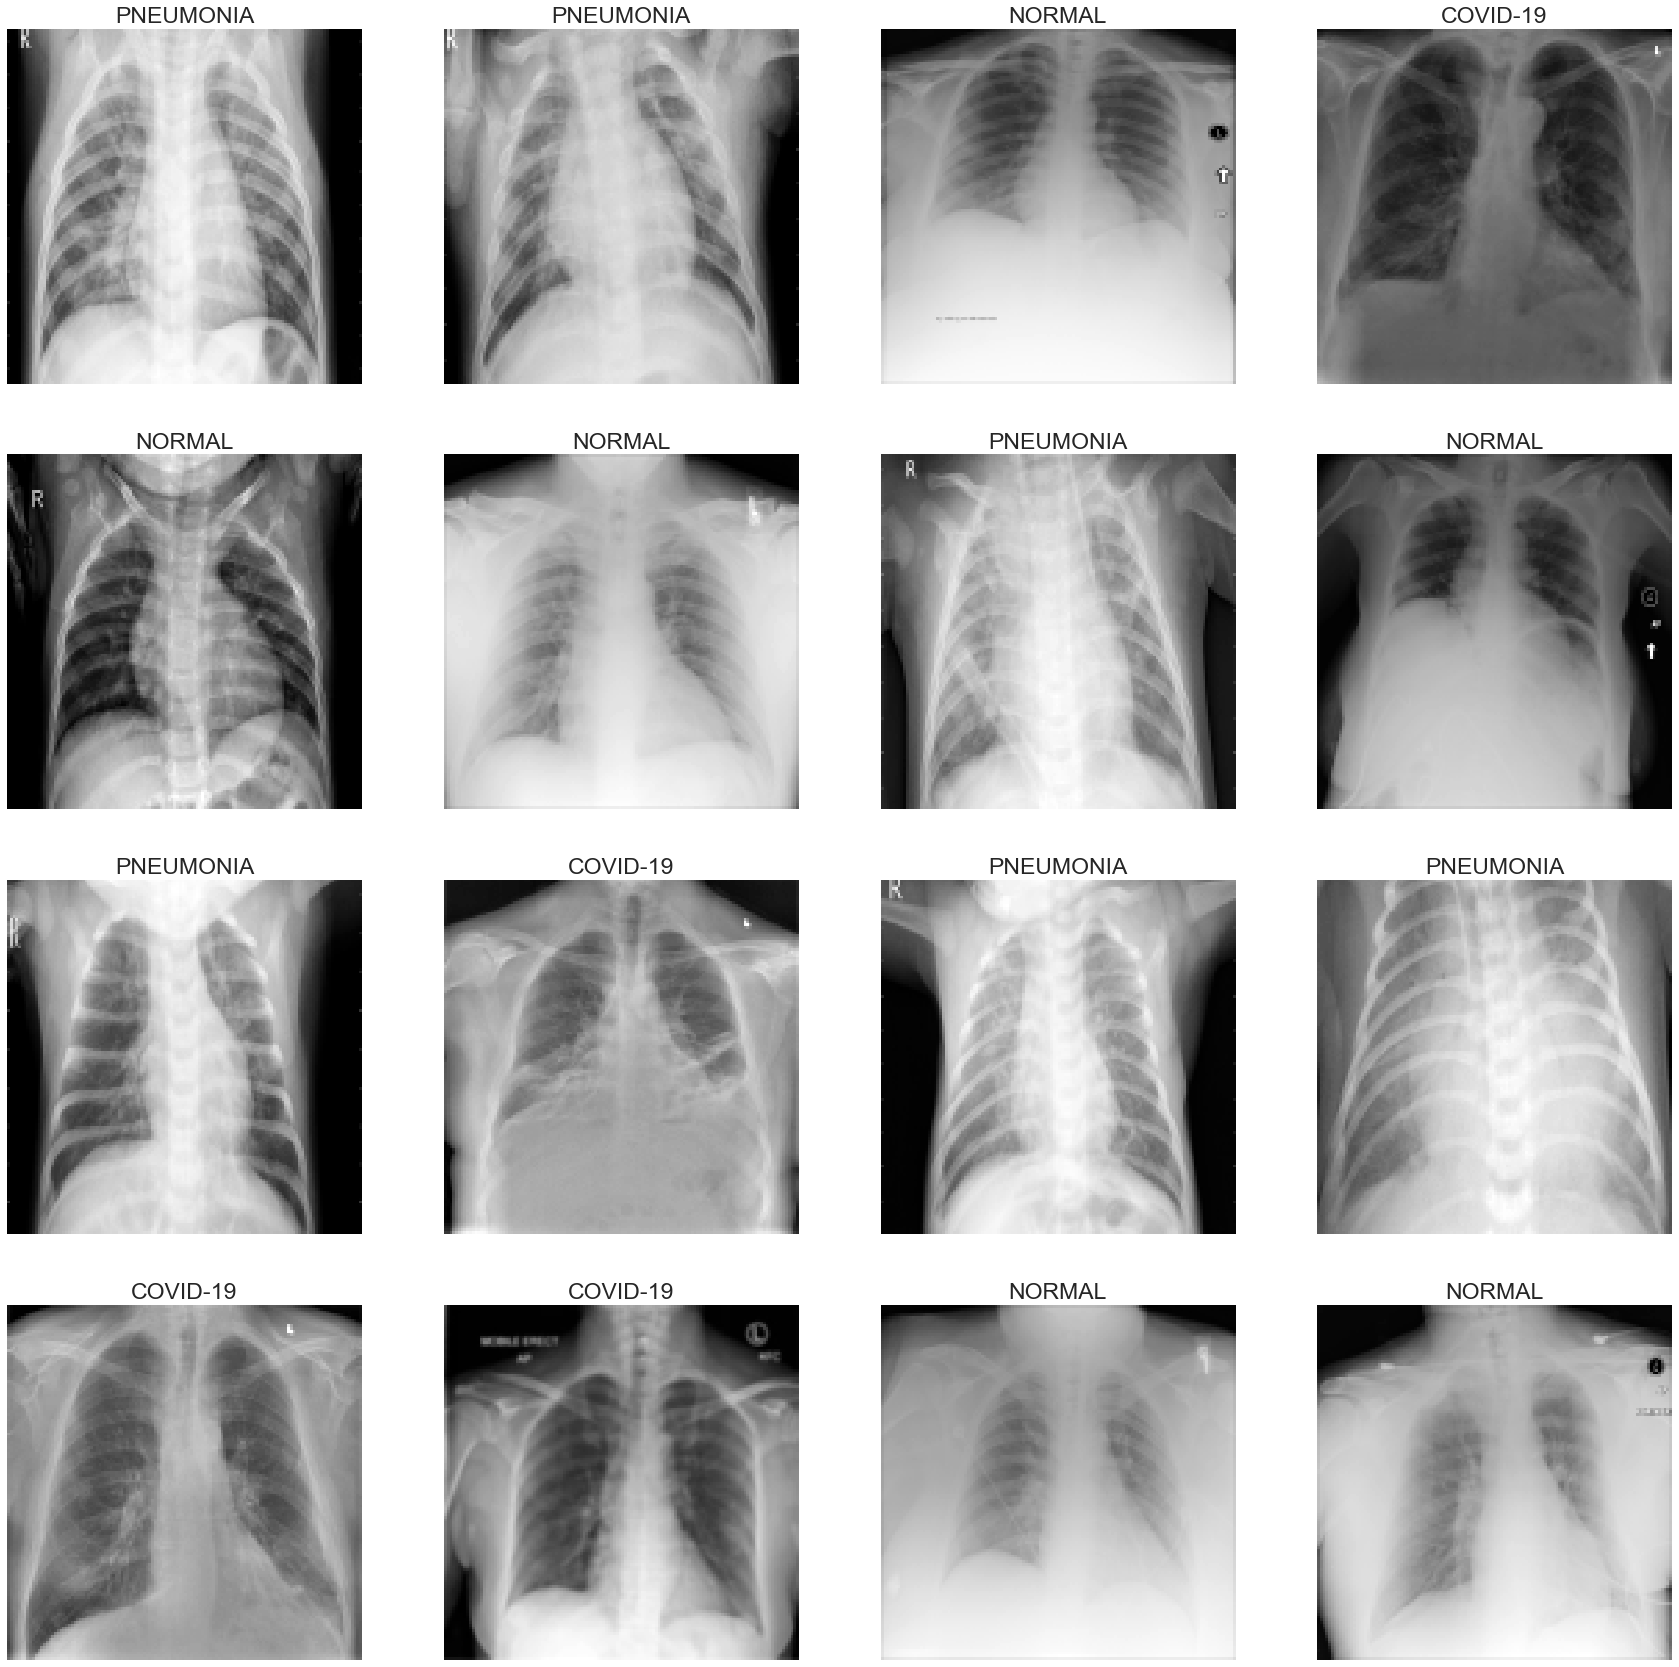

In [175]:
plt.figure(figsize=(30,30))
for n , i in enumerate(list(np.random.randint(0,len(X_test),16))) : 
    plt.subplot(4,4,n+1)
    plt.imshow(X_test[i]) 
    plt.gray()
    plt.axis('off')
    plt.title(getcode(y_test[i]), fontsize=23)

In [170]:
X_pred = []
files = gb.glob(pathname= str('Predict/*.'+Extention))
for file in files: 
    image = cv2.imread(file)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_array = cv2.resize(gray_image , (s,s), interpolation = cv2.INTER_AREA)
    X_pred.append(list(image_array))  

In [171]:
print(f'we have {len(X_pred)} items in X_pred')

we have 1669 items in X_pred


In [172]:
random.shuffle(X_pred)

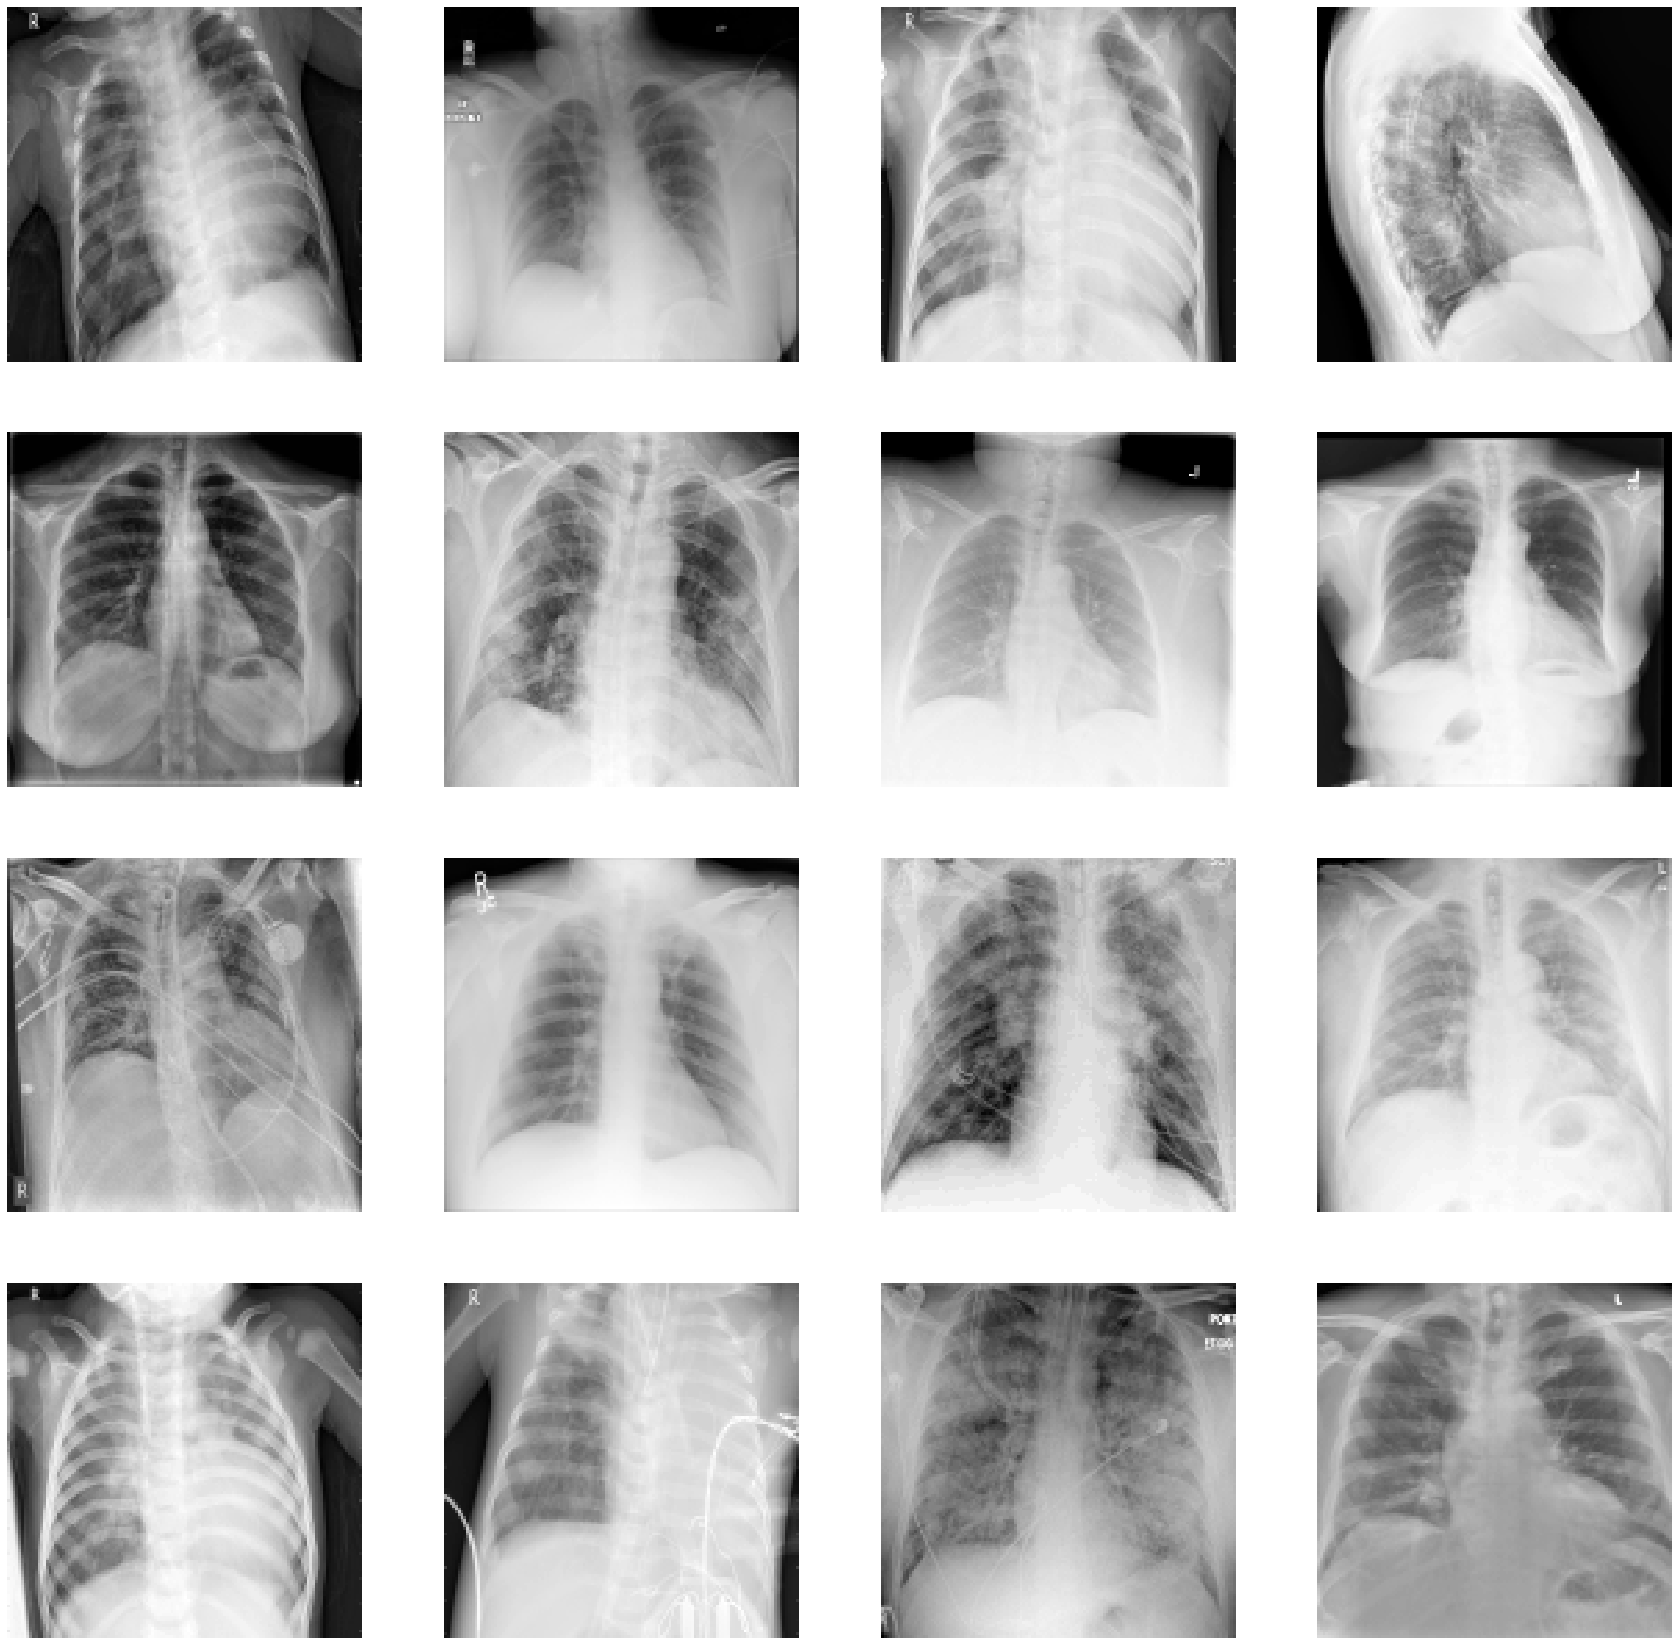

In [176]:
plt.figure(figsize=(30,30))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),16))) : 
    plt.subplot(4,4,n+1)
    plt.imshow(X_pred[i]) 
    plt.gray()
    plt.axis('off')

### ====================================================================================


# Building The Model 

now we need to build the model to train our data

first to convert the data into arrays using numpy

In [23]:

X_train = np.array(X_train)
X_test = np.array(X_test)
X_pred_array = np.array(X_pred)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'X_pred shape  is {X_pred_array.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (7353, 128, 128)
X_test shape  is (3475, 128, 128)
X_pred shape  is (1669, 128, 128)
y_train shape  is (7353,)
y_test shape  is (3475,)


In [79]:
#from keras.utils import to_categorical
#y_train1 = to_categorical(y_train)
#print(y_train1.shape)
#Keras need data in 4 dimention
# Reshape image in 3 dimensions (height = 28px, width = 28px , channels = 1)
X_train = X_train.reshape(-1,s,s,1)
X_test = X_test.reshape(-1,s,s,1)
X_pred_array = X_pred_array.reshape(-1,s,s,1)
print(X_train.shape)
print(X_test.shape)
print(X_pred_array.shape)

(7353, 128, 128, 1)
(3475, 128, 128, 1)
(1669, 128, 128, 1)


In [140]:
KerasModel = keras.models.Sequential([
            keras.layers.BatchNormalization(input_shape=(s,s,1)),
            keras.layers.Conv2D(16, kernel_size=(3,3), padding='same', activation='relu'),
            keras.layers.Conv2D(32, kernel_size=(3,3),padding='same',  activation='relu'),
            keras.layers.MaxPool2D(2,2),
            
            keras.layers.Conv2D(64, kernel_size=(3,3), padding='same',activation='relu'),
            keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
            keras.layers.MaxPool2D(pool_size=(2,2)),
            
            keras.layers.Flatten(),
            keras.layers.Dense(128, activation='relu'),
            keras.layers.Dropout(0.32),
            keras.layers.Dense(64, activation='relu'),
            keras.layers.Dropout(0.32),
            #keras.layers.Dense(32, activation='relu'),
            keras.layers.Dense(3, activation='softmax')    
        ])

In [141]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [142]:
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_20 (Batc (None, 128, 128, 1)       4         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 128, 128, 16)      160       
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (No

In [143]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

model_chkpt = ModelCheckpoint('best_mod.h5', save_best_only=True, monitor='accuracy')
early_stopping = EarlyStopping(monitor='loss', restore_best_weights=False, patience=10)

In [144]:
epochs = 28
ThisModel = KerasModel.fit(X_train, y_train, epochs=epochs,batch_size=16,shuffle=True,verbose=1,
                            validation_split=0.23,
                            callbacks=[model_chkpt ,early_stopping])
#,validation_data=(X_test, y_test)

Train on 5661 samples, validate on 1692 samples
Epoch 1/28
5661/5661 [==============================] - 40s 7ms/step - loss: 0.5958 - accuracy: 0.7499 - val_loss: 0.3878 - val_accuracy: 0.8546
Epoch 2/28
5661/5661 [==============================] - 39s 7ms/step - loss: 0.3862 - accuracy: 0.8562 - val_loss: 0.3090 - val_accuracy: 0.8954
Epoch 3/28
5661/5661 [==============================] - 39s 7ms/step - loss: 0.2702 - accuracy: 0.9108 - val_loss: 0.3013 - val_accuracy: 0.8954
Epoch 4/28
5661/5661 [==============================] - 39s 7ms/step - loss: 0.2088 - accuracy: 0.9286 - val_loss: 0.2805 - val_accuracy: 0.9025
Epoch 5/28
5661/5661 [==============================] - 39s 7ms/step - loss: 0.1717 - accuracy: 0.9412 - val_loss: 0.3127 - val_accuracy: 0.9013
Epoch 6/28
5661/5661 [==============================] - 39s 7ms/step - loss: 0.1456 - accuracy: 0.9475 - val_loss: 0.3531 - val_accuracy: 0.8995
Epoch 7/28
5661/5661 [==============================] - 39s 7ms/step - loss: 0.117

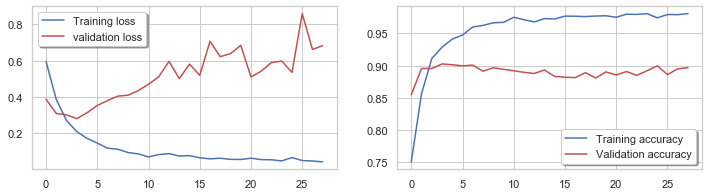

In [145]:
fig, ax = plt.subplots(1,2, figsize=(12, 3))
ax[0].plot(ThisModel.history['loss'], color='b', label="Training loss")
ax[0].plot(ThisModel.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(ThisModel.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(ThisModel.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [146]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test,batch_size=32)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

3475/3475 [==============================] - 5s 1ms/step
Test Loss is 0.1375698884567179
Test Accuracy is 0.9726618528366089


### now to predict X test

In [147]:
y_pred = KerasModel.predict(X_test)

print('Prediction Shape is {}'.format(y_pred.shape))

Prediction Shape is (3475, 3)


great

now it's time to redict X Predict

In [148]:
y_result = KerasModel.predict(X_pred_array)

print('Prediction Shape is {}'.format(y_result.shape))

Prediction Shape is (1669, 3)


### and to show random redicted pictures & its predicting category

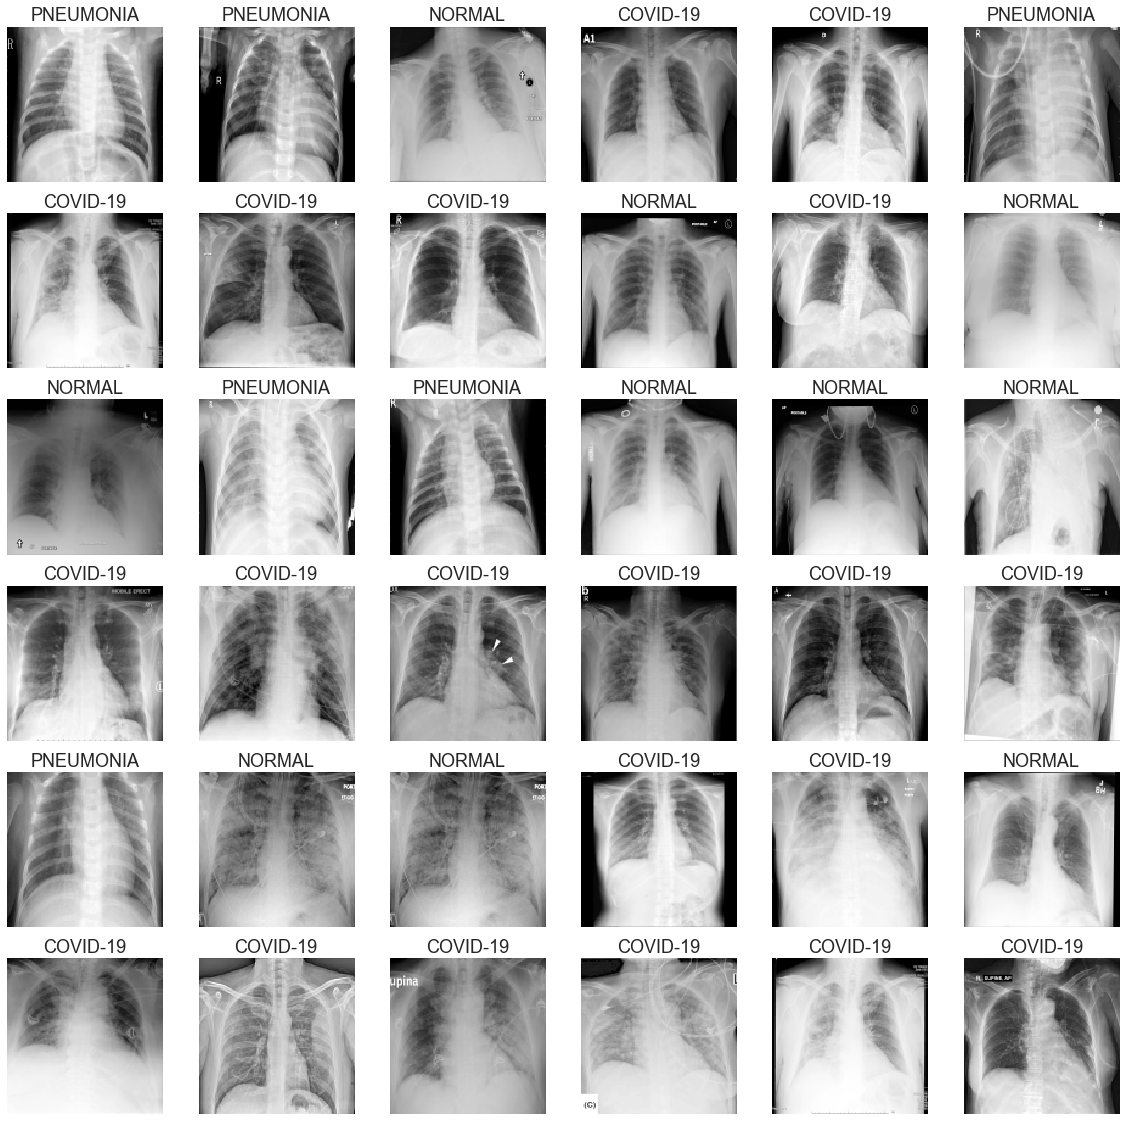

In [149]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')
    plt.gray()
    plt.title(getcode(np.argmax(y_result[i])), fontsize=18)